In [1]:
import pandas as pd 
import numpy as np 
# Importing Housing.csv 
housing = pd.read_csv('Housing.csv')
# What type of values are stored in the columns? http://housing.infohousing.info()

In [2]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Converting Yes to 1 and No to 0 
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0}) 
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0}) 
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0}) 
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0}) 
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0}) 
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [4]:
# Creating a dummy variable for 'furnishingstatus' 
status = pd.get_dummies(housing['furnishingstatus'])

In [5]:
# The result has created three variables that are not needed. 
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [6]:
# we don't need 3 columns. 
# we can use drop_first = True to drop the first column from status df. 
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)

In [7]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [8]:
#Adding the results to the master dataframe 
housing = pd.concat([housing,status],axis=1) 
# Now let's see the head of our dataframe. 
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [9]:

# Dropping furnishingstatus as we have created the dummies for it 
housing.drop(['furnishingstatus'],axis=1,inplace=True) 


# Now let's see the head of our dataframe. 
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [10]:
# Let us create the new metric and assign it to "areaperbedroom" 
housing['areaperbedroom'] = housing['area']/housing['bedrooms'] 

# Metric:bathrooms per bedroom 
housing['bbratio'] = housing['bathrooms']/housing['bedrooms'] 
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [11]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x))) 


# applying normalize ( ) to all columns 
housing = housing.apply(normalize)

In [12]:
# Putting feature variable to X 
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
'parking', 'prefarea', 'semi-furnished', 'unfurnished',
'areaperbedroom', 'bbratio']] 

# Putting response variable to y 
y = housing['price']

In [13]:
#random_state is the seed used by the random number generator, it can be any integer. 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [14]:
import statsmodels.api as sm # Importing statsmodels 
X_train = sm.add_constant(X_train) # Adding a constant column to our dataframe 
# create a first fitted model 
lm_1 = sm.OLS(y_train,X_train).fit()

/Users/maheeprg/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
#Let's see the summary of our first linear model 
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sat, 23 May 2020   Prob (F-statistic):           4.56e-82
Time:                        17:16:23   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

In [16]:
# UDF for calculating vif value 
def vif_cal(input_data, dependent_col): 
    vif_df = pd.DataFrame( columns = ['Var', 'Vif']) 
    
    x_vars=input_data.drop([dependent_col], axis=1) 
    xvar_names=x_vars.columns 

    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])] 
        rsq=sm.OLS(y,x).fit().rsquared 
        vif=round(1/(1-rsq),2) 
        vif_df.loc[i] = [xvar_names[i], vif]
    
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [17]:
# Calculating Vif value| 
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


In [18]:
# Importing matplotlib and seaborn 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

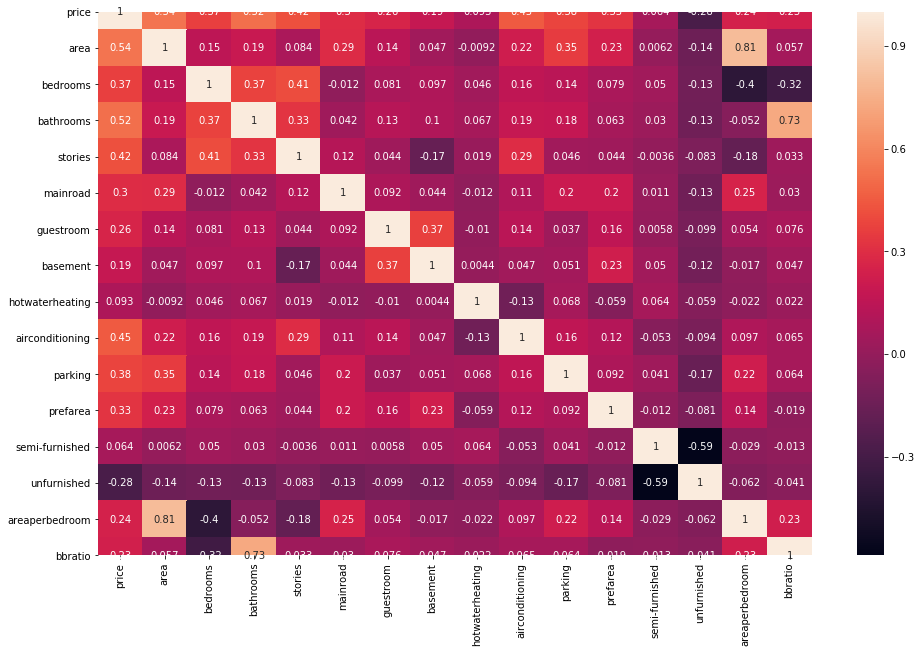

In [19]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10)) # Size of the figure 
sns.heatmap(housing.corr(),annot = True)

In [20]:
# Dropping highly correlated variables and insignificant variables 
X_train = X_train.drop('bbratio', 1) 

# Create a second fitted model 
lm_2 = sm.OLS(y_train,X_train).fit() 

#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Sat, 23 May 2020   Prob (F-statistic):           6.46e-83
Time:                        17:16:26   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

In [21]:
# Calculating Vif value 
vif_cal(input_data=housing.drop(["bbratio"], axis=1), dependent_col="price")

,Var,Vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [22]:
# Dropping highly correlated variables and insignificant variables 
X_train = X_train.drop('bedrooms', 1) 
# Create a third fitted model 
lm_3 = sm.OLS(y_train,X_train).fit() 
#Let's see the summary of our third linear model 
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.66e-83
Time:                        17:16:26   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [23]:
# # Dropping highly correlated variables and insignificant variables 
X_train = X_train.drop('areaperbedroom', 1) 
# Create a fourth fitted model 
lm_4 = sm.OLS(y_train,X_train).fit() 
#Let's see the summary of our fourth linear model 
print(lm_4.summary()) 
# Calculating Vif value 
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom"], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sat, 23 May 2020   Prob (F-statistic):           2.35e-83
Time:                        17:16:26   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


In [24]:
# # Dropping highly correlated variables and insignificant variables 
X_train = X_train.drop('semi-furnished', 1) 
# Create a fifth fitted model 
lm_5 = sm.OLS(y_train,X_train).fit() 
#Let's see the summary of our fifth linear model 
print(lm_5.summary()) 
# Calculating Vif value 
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished"], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 23 May 2020   Prob (F-statistic):           2.73e-84
Time:                        17:16:26   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [25]:
# # Dropping highly correlated variables and insignificant variables 
X_train = X_train.drop('basement', 1) 
# Create a sixth fitted model 
lm_6 = sm.OLS(y_train,X_train).fit() 
#Let's see the summary of our sixth linear model 
print(lm_6.summary()) 
# Calculating Vif value 
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sat, 23 May 2020   Prob (F-statistic):           3.13e-84
Time:                        17:16:26   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08
